In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Import modules and utilities

In [2]:
%cd '/content/drive/My Drive/Colab Notebooks/opinion-lab-group-2.3/refactorization'
%pwd 

!pip install -q sentencepiece
!pip install -q tf_sentencepiece

/content/drive/My Drive/Colab Notebooks/opinion-lab-group-2.3/refactorization
     |████████████████████████████████| 1.1MB 7.9MB/s 
     |████████████████████████████████| 2.1MB 9.2MB/s 


In [3]:
import numpy as np

from embedding import Embedding
from util import Source, load_sentences, load_sentences_index, replace_url

Instructions for updating:
non-resource variables are not supported in the long term
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Load sentences and preprocessing

Preprocessing includes
1.   replacing url with string 'url'
2.   ignoring sentences with length larger than 15 characters



In [4]:
sfile = '/content/drive/My Drive/Colab Notebooks/opinion-lab-group-2.3/output_emb/all_sentences_str.json'
ifile = '/content/drive/My Drive/Colab Notebooks/opinion-lab-group-2.3/output_emb/all_sentences_ind.json'

sentences = load_sentences(sfile)
# replace the url with string 'url'
sentences = [replace_url(sentence) for sentence in sentences]
sentences = np.array(sentences)

en_indeces = load_sentences_index(ifile, [Source.NYTIMES, Source.QUORA])
de_indeces = load_sentences_index(ifile, [Source.SPEIGEL])

# get sentences indeces (global indeces) for sentences whose length larger than 15 characters
en_indeces_sm = [i for i, s in zip(en_indeces, sentences[en_indeces]) if len(s) > 15]
de_indeces_sm = [i for i, s in zip(de_indeces, sentences[de_indeces]) if len(s) > 15]

print('Number of sentences with length larger than 15 characters: ', len(en_indeces_sm + de_indeces_sm))


Sentences file - loaded
Done - appended all sentences
Number of tokenized sentences from corpus: 353786
Sentences index file - loaded
Done - appended all sentences indeces
Number of indeces from corpus ['nytimes', 'quora']: 136425
Sentences index file - loaded
Done - appended all sentences indeces
Number of indeces from corpus ['spiegel']: 217361
Number of sentences with length larger than 15 characters:  328091


In [ ]:
# save the English and German sentences whose length larger than 15 characters
np.save('en_sentences.npy', sentences[en_indeces_sm])
np.save('de_sentences.npy', sentences[de_indeces_sm])
# save the indeces for English and German sentences whose length larger than 15 characters
np.save('en_sentence_global_id.npy', np.array(en_indeces_sm))
np.save('de_sentence_global_id.npy', np.array(de_indeces_sm))

# Create embedding for preprocessed sentences

In [ ]:
# initiate session for sentences embedding generation
%time session = Embedding()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


CPU times: user 14.8 s, sys: 879 ms, total: 15.7 s
Wall time: 15.7 s


In [ ]:
# create embeddings for English sentences whose length larger than 15 characters
en_embeddings = session.get_embedding(sentences[en_indeces_sm])
np.save('en_embeddings.npy', en_embeddings)

Total iterations: 127464
Now: 0
Now: 10000
Now: 20000
Now: 30000
Now: 40000
Now: 50000
Now: 60000
Now: 70000
Now: 80000
Now: 90000
Now: 100000
Now: 110000
Now: 120000


In [ ]:
# create embeddings for German sentences whose length larger than 15 characters
de_embeddings = session.get_embedding(sentences[de_indeces_sm])
np.save('de_embeddings.npy', de_embeddings)

Total iterations: 200627
Now: 0
Now: 10000
Now: 20000
Now: 30000
Now: 40000
Now: 50000
Now: 60000
Now: 70000
Now: 80000
Now: 90000
Now: 100000
Now: 110000
Now: 120000
Now: 130000
Now: 140000
Now: 150000
Now: 160000
Now: 170000
Now: 180000
Now: 190000
Now: 200000


In [ ]:
# ensure the size for embeddings and sentences matched
assert en_embeddings.shape[0] == sentences[en_indeces_sm].shape[0]
assert de_embeddings.shape[0] == sentences[de_indeces_sm].shape[0]

# Appendix

## Distribution of sentence length after replacing URLs

In [5]:
import matplotlib.pyplot as plt

### For all sentences

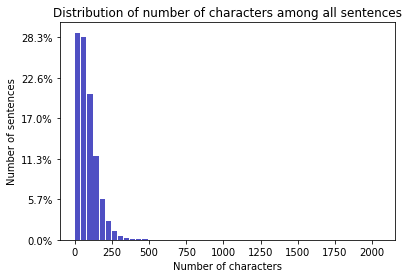

In [6]:
# get list of sentence length for all sentences
sentence_size_dist = [len(s) for s in sentences]
plt.axes(title = 'Distribution of number of characters among all sentences', xlabel = 'Number of characters', ylabel = 'Number of sentences')
n, bins, patches = plt.hist(x = sentence_size_dist, bins = 50, color = '#0504aa',alpha = 0.7, rwidth = 0.85)
ax = plt.gca()
vals = ax.get_yticks()
ax.set_yticklabels(['%1.1f%%' %(i / len(sentences) * 100) for i in vals])
plt.show()



### For sentences with length < 150

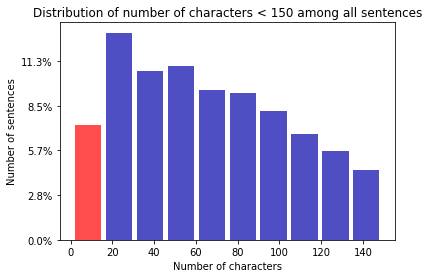

In [7]:
sentence_size_dist = [len(s) for s in sentences if len(s) < 150]
plt.axes(title = 'Distribution of number of characters < 150 among all sentences', xlabel = 'Number of characters', ylabel = 'Number of sentences')
n, bins, patches = plt.hist(x = sentence_size_dist, bins = 10, color = '#0504aa', alpha = 0.7, rwidth = 0.85)
ax = plt.gca()
vals = ax.get_yticks()
ax.set_yticklabels(['%1.1f%%' %(i / len(sentences) * 100) for i in vals])
ax.patches[0].set_facecolor('r')
plt.show()

In [9]:
sentences_within_150_chars = [s for s in sentences if len(s) < 150]
sentences_within_15_chars = [s for s in sentences if len(s) < 15]
print('Number of sentences with length smaller than 150 characters:', len(sentences_within_150_chars))
print('Percentage of them among all the sentences: {:.1f}%'.format(len(sentences_within_150_chars) / len(sentences) * 100))
print('Number of sentences with length smaller than 15 characters:', len(sentences_within_15_chars))
print('Percentage of them among all the sentences: {:.1f}%'.format(len(sentences_within_15_chars) / len(sentences) * 100))
print('List of them:')
sentences_within_15_chars

Number of sentences with length smaller than 150 characters: 302766
Percentage of them among all the sentences: 85.6%
Number of sentences with length smaller than 15 characters: 23242
Percentage of them among all the sentences: 6.6%
List of them:


['Organic" seal.',
 'Sweat said.',
 'It’s crazy!.',
 'etc.',
 'The New Cook',
 'Huh?',
 'Here, here!',
 'Huh?',
 '–Ro',
 'So do both.',
 'Thanks.',
 '“Jill.',
 'Sophia.',
 'Bob frowned.',
 'But the best?',
 'Mark,.',
 '(I say yes.',
 'Guy',
 'Of course not.',
 'Yes it does.',
 'I just can’t.',
 '- Supertramp',
 'Hi!',
 'It is elitist.',
 "'Mr.",
 'scores.',
 '"- Virgil.',
 'Yeah.',
 'url',
 'RC is right.',
 ':).',
 'God Bless ~Amy',
 'Knock it off.',
 'thanks!',
 'url',
 'that is it.',
 '4/24/11.',
 'Ms.',
 'had argued.',
 'The problem?',
 'The cost.',
 'No way.',
 '.',
 'What Sue said.',
 ').',
 '(url.',
 '(url.',
 'Seriously.',
 '"Smoke?',
 '"Pesticides?',
 'Herbicides?',
 'I was wrong.',
 'Wow.',
 'So yeah, wow.',
 'url',
 'ingredients.',
 'seed.”.',
 '\x95.',
 '\x95.',
 '.',
 '.',
 '.',
 'F.D.A.',
 'F.D.A.',
 'Great article!',
 '1.',
 '2.',
 '3.',
 '$26 a pound!',
 'We paid',
 'Who knows?',
 '.',
 '.',
 'I don’t care.',
 'But who cares?',
 'Hmm.',
 'nice post.',
 'Total: $180.',
 '